In [1]:
%load_ext autoreload
%autoreload

import json
import bogglesolver as boggle

with open('words_dictionary.json') as data_file:    
    data = json.load(data_file)
#data = []
#with open('sowpods.txt') as f:
#    for line in f:
#        data.append(line)
    
all_words = []
for d in data:
    all_words.append(d)


In [13]:
print("word count: "+ str(len(all_words)))

letter_count=0
for t in all_words:
    letter_count=letter_count+len(t)    
print("avg word length: "+str(letter_count/len(all_words)))

vowels = list('aeiou')
vow_count = 0
for w in all_words:
    for l in w:
        if l in vowels:
            vow_count=vow_count+1
VOWEL_P = vow_count/letter_count
print("vowel fraction: "+str(VOWEL_P))

LETTER_DISTR = {}
for l in list('abcdefghijklmnopqrstuvwxyz'):
    LETTER_DISTR[l] = 0
for t in all_words:
    for l in t:
        if l in list('abcdefghijklmnopqrstuvwxyz'):
            LETTER_DISTR[l] = LETTER_DISTR[l]+1
for l in LETTER_DISTR:
    LETTER_DISTR[l]=LETTER_DISTR[l]/letter_count
    
vv = 0
vc = 0
cc = 0
cv = 0
def is_vowel(x):
    return x in list('aeiou')
def is_consonant(x):
    return x in list('bcdfghjklmnpqrstvwxyz')

for w in all_words:
    for i in range(0, len(w)-1):
        a = w[i]
        b = w[i+1]
        if is_vowel(a):
            if is_vowel(b):
                vv = vv+1
                continue
            if is_consonant(b):
                vc = vc+1
                continue
        if is_consonant(a):
            if is_vowel(b):
                cv = cv+1
                continue
            if is_consonant(b):
                cc = cc+1
                continue
                
print("v followed by v: "+str(vv/(vv+vc+cc+cv)))
print("v followed by c: "+str(vc/(vv+vc+cc+cv)))
print("c followed by v: "+str(cv/(vv+vc+cc+cv)))
print("c followed by c: "+str(cc/(vv+vc+cc+cv)))

word count: 370101
avg word length: 9.442568379982761
vowel fraction: 0.39155075794688193
v followed by v: 0.05332620281834565
v followed by c: 0.3586498619502855
c followed by v: 0.356356127618296
c followed by c: 0.2316678076130729


In [3]:
T = boggle.Tester(all_words, 4)

In [4]:
%autoreload

import datetime
import random as rnd

def printmatrix(ls, size):
    print(ls)
    lls = []
    for r in range(0,size):
        line = []
        for c in range(0,size):
            line.append(ls[r*size+c])
        lls.append(line)
    print("=====")
    for line in lls:
        print(line)

CHARSET = list('abcdefghijklmnopqrstuvwxyz')
VOWELS = list('aeiou')
CONSONANTS = list('bcdfghjklmnpqrstvwxyz')

def generateRandom(size):
    ls = []
    for i in range(0,size*size):
        ls.append(CHARSET[rnd.randint(0,len(CHARSET)-1)])
    return ls

inputs = []
for i in range(0,1000):
    inputs.append(generateRandom(4))
    
res = T.test_multiple(inputs)
print(res.avg_word_num)

141.426


In [5]:
def generateVowelRatio(size):
    ls = []
    for i in range(0, size*size):
        x = rnd.random()
        if x<=VOWEL_P:
            ls.append(rnd.choice(VOWELS))
        else:
            ls.append(rnd.choice(CONSONANTS))
    return ls

inputs = []
for i in range(0,1000):
    inputs.append(generateVowelRatio(4))
    
res = T.test_multiple(inputs)
print(res.avg_word_num)

202.089


In [11]:
def weighted_random_choice(choices):
    m = sum(choices.values())
    pick = rnd.uniform(0, m)
    current = 0
    for key, value in choices.items():
        current += value
        if current > pick:
            return key
     
def generateFromDistribution(size):
    ls = []
    for i in range(0,size*size):
        ls.append(weighted_random_choice(LETTER_DISTR))
    return ls
    
inputs = []
for i in range(0,1000):
    inputs.append(generateFromDistribution(4))
       
res = T.test_multiple(inputs)
print(res.avg_word_num)

404.117


In [17]:
VOWEL_DISTR = {}
CONSONANT_DISTR = {}
for x in letter_distr:
    if x in VOWELS:
        VOWEL_DISTR[x]=LETTER_DISTR[x]
    else:
        CONSONANT_DISTR[x]=LETTER_DISTR[x]

def get_ratio(ls):
    v_num = 0
    if len(ls) == 0:
        return 0
    for x in ls:
        if x in VOWELS:
            v_num = v_num+1 
    return v_num/len(ls)
        
def generateFromDistributionBalanced(size):
    ls = []
    for i in range(0, size*size):
        v_ratio = get_ratio(ls)
        if v_ratio<VOWEL_P:
            ls.append(weighted_random_choice(VOWEL_DISTR))
        else:
            ls.append(weighted_random_choice(CONSONANT_DISTR))
    rnd.shuffle(ls)
    return ls
           
inputs = []
for i in range(0,1000):
    inputs.append(generateFromDistributionBalanced(4))
       
res = T.test_multiple(inputs)
print(res.avg_word_num)

436.406


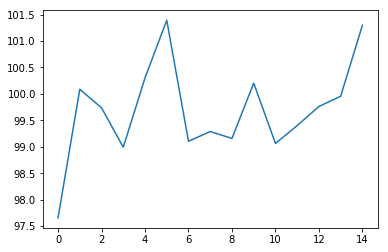

In [22]:
import matplotlib.pyplot as plt

def generateVowelNumber(size, vowel_number):
    ls = []
    for i in range(0,vowel_number):
        ls.append(weighted_random_choice(VOWEL_DISTR))
    for i in range(vowel_number, size*size):
        ls.append(weighted_random_choice(CONSONANT_DISTR))
    rnd.shuffle(ls)
    return ls

counts = []
for i in range(1,16):
    inputs = []
    for i in range(0,1000):
        inputs.append(generateVowelNumber(4,i))
    res = T.test_multiple(inputs)
    counts.append(res.avg_word_num)
    
plt.plot(counts)

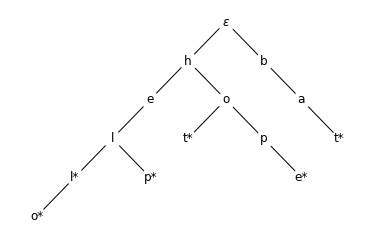

In [48]:
G=nx.Graph()
for i in range(1,14):
    G.add_node(i)  
G.add_edge(1,2)  
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(2,7)
G.add_edge(7,8)
G.add_edge(7,9)
G.add_edge(9,10)
G.add_edge(1,11)
G.add_edge(11,12)
G.add_edge(12,13)
G.add_edge(4,14)

posdict = {}
posdict[6]=(0,0)
posdict[5]=(1,1)
posdict[4]=(2,2)
posdict[3]=(3,3)
posdict[2]=(4,4)
posdict[1]=(5,5)
posdict[7]=(5,3)
posdict[8]=(4,2)
posdict[9]=(6,2)
posdict[10]=(7,1)
posdict[11]=(6,4)
posdict[12]=(7,3)
posdict[13]=(8,2)
posdict[14]=(3,1)

abc = [r'$\epsilon$','h','e','l','l*','o*','o','t*','p','e*','b','a','t*','p*']
labels = {}
for i in range(1,15):
    labels[i]=abc[i-1]
    
plt.axis('off')
nx.draw_networkx(G, posdict, node_color="w", labels=labels)
plt.savefig('tree.png')